# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [4]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [5]:
print(f"The shape of df_hh_income (rows, colomns): {df_hh_income.shape}")
print(f"The shape of df_pct_poverty (rows, colomns): {df_pct_poverty.shape}")
print(f"The shape of df_pct_completed_hs (rows, colomns): {df_pct_completed_hs.shape}")
print(f"The shape of df_share_race_city (rows, colomns): {df_share_race_city.shape}")
print(f"The shape of df_fatalities (rows, colomns): {df_fatalities.shape}")

The shape of df_hh_income (rows, colomns): (29322, 3)
The shape of df_pct_poverty (rows, colomns): (29329, 3)
The shape of df_pct_completed_hs (rows, colomns): (29329, 3)
The shape of df_share_race_city (rows, colomns): (29268, 7)
The shape of df_fatalities (rows, colomns): (2535, 14)


In [6]:
print(f"The column names in df_hh_income:\n {df_hh_income.columns}")
print(f"\nThe column names in df_pct_poverty:\n {df_pct_poverty.columns}")
print(f"\nThe column names in df_pct_completed_hs:\n {df_pct_completed_hs.columns}")
print(f"\nThe column names in df_share_race_city:\n {df_share_race_city.columns}")
print(f"\nThe column names in df_fatalities:\n {df_fatalities.columns}")

The column names in df_hh_income:
 Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

The column names in df_pct_poverty:
 Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

The column names in df_pct_completed_hs:
 Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

The column names in df_share_race_city:
 Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

The column names in df_fatalities:
 Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [7]:
print(f"df_hh_income - NaN in DF: {df_hh_income.isna().count().any()}\ndf_hh_income - Duplicates in DF?: {df_hh_income.duplicated().count().any()}\n")
print(f"df_pct_poverty - NaN in DF: {df_pct_poverty.isna().count().any()}\ndf_pct_poverty - Duplicates in DF?: {df_pct_poverty.duplicated().count().any()}\n")
print(f"df_pct_completed_hs - NaN in DF: {df_pct_completed_hs.isna().count().any()}\ndf_pct_completed_hs - Duplicates in DF?: {df_pct_completed_hs.duplicated().count().any()}\n")
print(f"df_share_race_city - NaN in DF: {df_share_race_city.isna().count().any()}\ndf_share_race_city - Duplicates in DF?: {df_share_race_city.duplicated().count().any()}\n")
print(f"df_fatalities - NaN in DF: {df_fatalities.isna().count().any()}\ndf_fatalities - Duplicates in DF?: {df_fatalities.duplicated().count().any()}\n")

df_hh_income - NaN in DF: True
df_hh_income - Duplicates in DF?: True

df_pct_poverty - NaN in DF: True
df_pct_poverty - Duplicates in DF?: True

df_pct_completed_hs - NaN in DF: True
df_pct_completed_hs - Duplicates in DF?: True

df_share_race_city - NaN in DF: True
df_share_race_city - Duplicates in DF?: True

df_fatalities - NaN in DF: True
df_fatalities - Duplicates in DF?: True



## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [8]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)

In [9]:
print(f"df_hh_income na check: \n{df_hh_income.isna().any()}")
print(f"\ndf_pct_poverty na check: \n{df_pct_poverty.isna().any()}")
print(f"\ndf_pct_completed_hs na check: \n{df_pct_completed_hs.isna().any()}")
print(f"\ndf_share_race_city na check: \n{df_share_race_city.isna().any()}")
print(f"\ndf_fatalities na check: \n{df_fatalities.isna().any()}")

df_hh_income na check: 
Geographic Area    False
City               False
Median Income      False
dtype: bool

df_pct_poverty na check: 
Geographic Area    False
City               False
poverty_rate       False
dtype: bool

df_pct_completed_hs na check: 
Geographic Area         False
City                    False
percent_completed_hs    False
dtype: bool

df_share_race_city na check: 
Geographic area          False
City                     False
share_white              False
share_black              False
share_native_american    False
share_asian              False
share_hispanic           False
dtype: bool

df_fatalities na check: 
id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness  

## Number Cleaning

In [10]:
# Poverty Rate DF
df_pct_poverty.loc[573]
df_pct_poverty['poverty_rate'].replace("-", 0, inplace=True)
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'])
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [11]:
# HS Graduation Rate DF
df_pct_completed_hs["percent_completed_hs"].replace("-", 0, inplace=True)
df_pct_completed_hs["percent_completed_hs"] = pd.to_numeric(df_pct_completed_hs["percent_completed_hs"])
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [12]:
# Share of Race by City DF
print(f"Before '(X)' row deletion: {df_share_race_city.shape}")
df_share_race_city = df_share_race_city[df_share_race_city.share_white != "(X)"]
print(f"After '(X)' row deletion: {df_share_race_city.shape}")
df_share_race_city["share_white"] = pd.to_numeric(df_share_race_city["share_white"])
df_share_race_city["share_black"] = pd.to_numeric(df_share_race_city["share_black"])
df_share_race_city["share_native_american"] = pd.to_numeric(df_share_race_city["share_native_american"])
df_share_race_city["share_asian"] = pd.to_numeric(df_share_race_city["share_asian"])
df_share_race_city["share_hispanic"] = pd.to_numeric(df_share_race_city["share_hispanic"])
df_share_race_city.info()

Before '(X)' row deletion: (29268, 7)
After '(X)' row deletion: (29248, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 29248 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29248 non-null  object 
 1   City                   29248 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.8+ MB


In [13]:
# Fatalities
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2535 non-null   object 
 5   age                      2535 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2535 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2535 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [14]:
povertyrate_by_state = df_pct_poverty[["Geographic Area", "poverty_rate"]]
povertyrate_by_state = povertyrate_by_state.groupby(by="Geographic Area", as_index=True).mean().sort_values("poverty_rate", ascending=False)
povertyrate_by_state.head()

,poverty_rate
Geographic Area,
MS,26.88
AZ,25.27
GA,23.66
AR,22.96
NM,22.51


In [15]:
povertyrate_bar = px.bar(x=povertyrate_by_state.index,
                         y=povertyrate_by_state['poverty_rate'],
                         title="Poverty Rate by State in the USA",
                         text_auto=".2s")

povertyrate_bar.update_layout(xaxis_title="State",
                              yaxis_title="Poverty Rate Percentage (%)")

povertyrate_bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [16]:
hscomprate_by_state = df_pct_completed_hs[["Geographic Area", "percent_completed_hs"]]
hscomprate_by_state = hscomprate_by_state.groupby(by="Geographic Area", as_index=True).mean().sort_values("percent_completed_hs", ascending=False)
hscomprate_by_state.head()

,percent_completed_hs
Geographic Area,
MA,92.03
HI,91.67
CT,91.59
ME,91.43
NH,90.71


In [17]:
hscomprate_bar = px.bar(x=hscomprate_by_state.index,
                        y=hscomprate_by_state['percent_completed_hs'],
                        title="High School Completion Rate by State in the USA",
                        text_auto=".2s")

hscomprate_bar.update_layout(xaxis_title="State",
                             yaxis_title="High School Completion Rate Percentage (%)")

hscomprate_bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [18]:
# Resorting the dataframes so that values are sorted by State
hscomprate_by_state = hscomprate_by_state.groupby(by="Geographic Area", as_index=True).mean()
povertyrate_by_state = povertyrate_by_state.groupby(by="Geographic Area", as_index=True).mean()

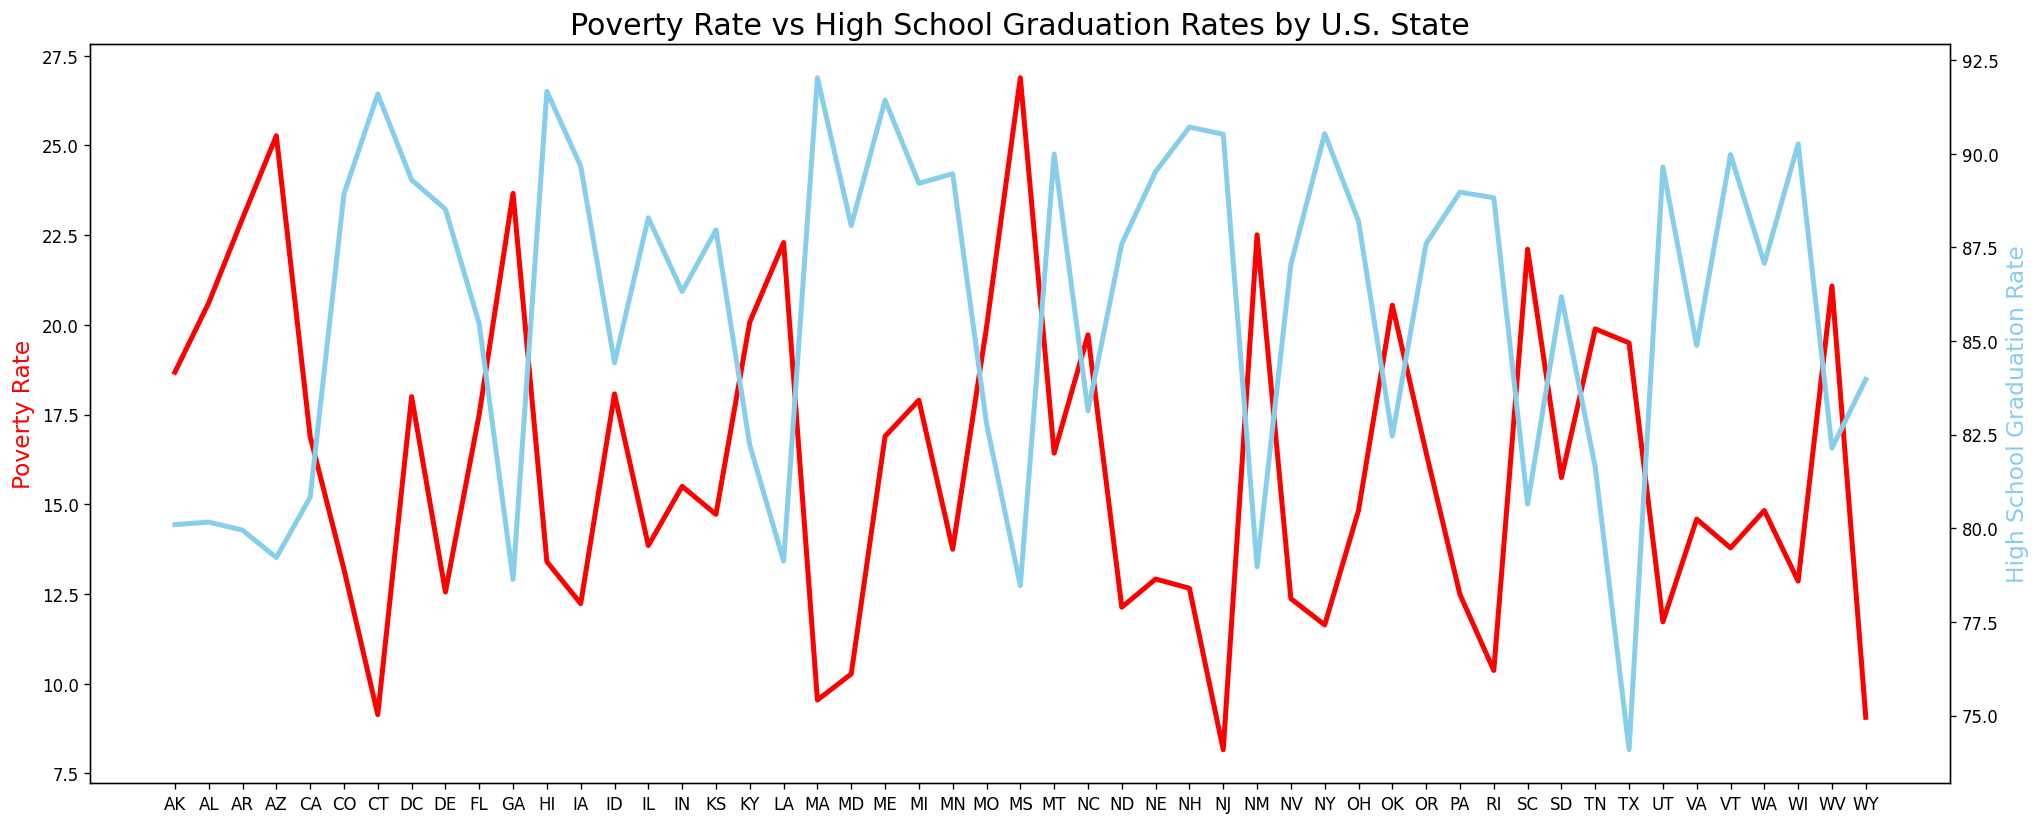

In [19]:
plt.figure(figsize=(20,8), dpi=120)
plt.title("Poverty Rate vs High School Graduation Rates by U.S. State", fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel("Poverty Rate", color="red", fontsize=14)
ax2.set_ylabel("High School Graduation Rate", color="skyblue", fontsize=14)

ax1.plot(povertyrate_by_state.index, povertyrate_by_state['poverty_rate'], color="red", linewidth=3)
ax2.plot(hscomprate_by_state.index, hscomprate_by_state['percent_completed_hs'], color="skyblue", linewidth=3)


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

In [20]:
# hscomprate_by_state povertyrate_by_state
poverty_hscomp_merge = pd.merge(povertyrate_by_state, hscomprate_by_state, on="Geographic Area", how="inner")
poverty_hscomp_merge.head()

,poverty_rate,percent_completed_hs
Geographic Area,,
AK,18.68,80.10
AL,20.61,80.16
AR,22.96,79.95
AZ,25.27,79.22
CA,16.89,80.82


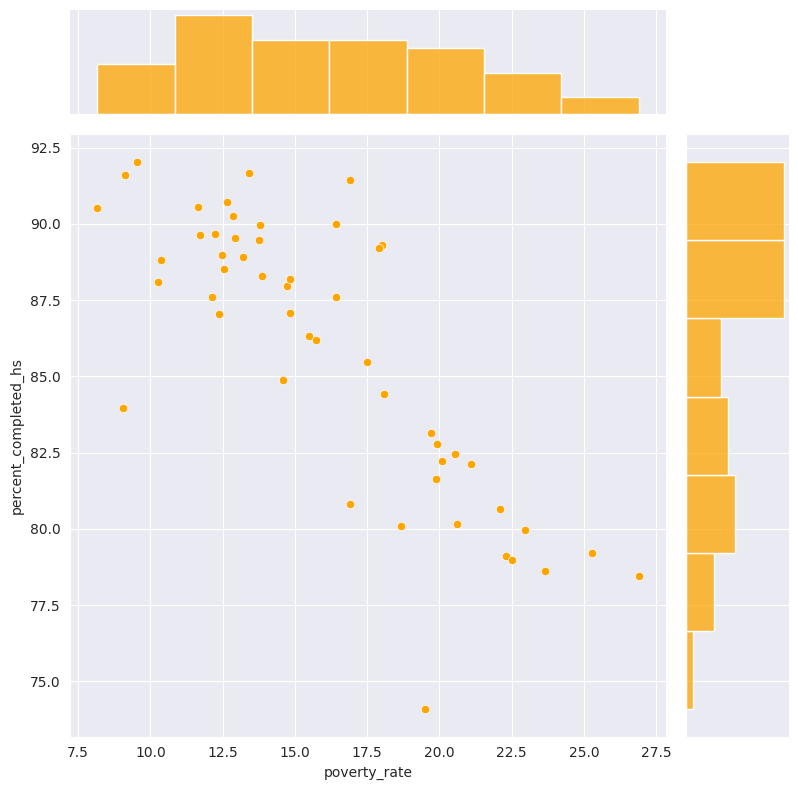

In [21]:
with sns.axes_style("darkgrid"):
  sns.jointplot(poverty_hscomp_merge,
                x="poverty_rate",
                y="percent_completed_hs",
                kind="scatter",
                height=8,
                color="orange",)

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

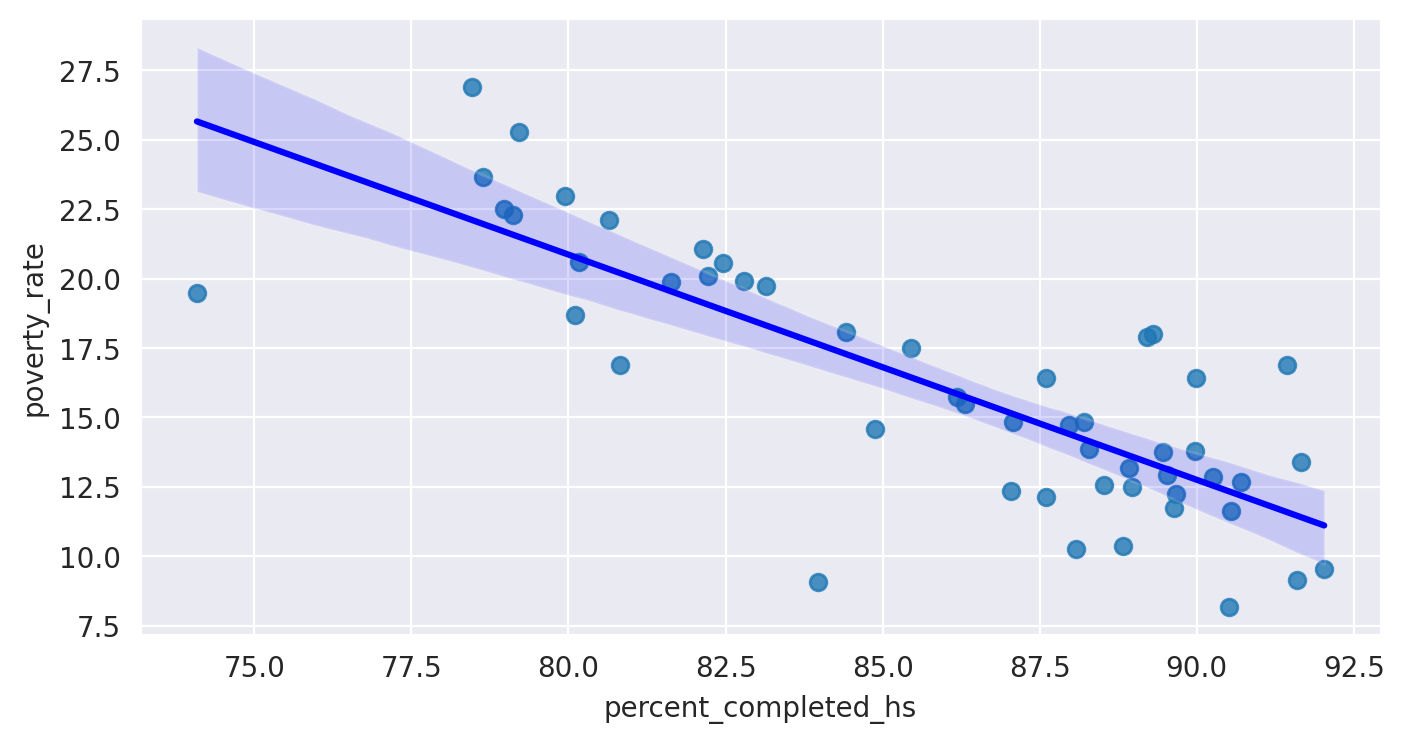

In [22]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  sns.regplot(poverty_hscomp_merge,
              x="percent_completed_hs",
              y="poverty_rate",
              lowess=False,
              line_kws={"color": "blue"})

  plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [23]:
race_count_by_state = df_share_race_city[["Geographic area", "share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]]
race_count_by_state = race_count_by_state.groupby(by="Geographic area", as_index=True).sum()
race_count_by_state.head()

race_count_by_state.insert(loc=5, column="total", value= race_count_by_state["share_white"] + race_count_by_state["share_black"] + race_count_by_state["share_native_american"] + race_count_by_state["share_asian"] + race_count_by_state["share_hispanic"])

race_pct_by_state = race_count_by_state[["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"]]
race_pct_by_state['share_white'] = race_count_by_state['share_white'] / race_count_by_state['total'] * 100
race_pct_by_state['share_black'] = race_count_by_state['share_black'] / race_count_by_state['total'] * 100
race_pct_by_state['share_native_american'] = race_count_by_state['share_native_american'] / race_count_by_state['total'] * 100
race_pct_by_state['share_asian'] = race_count_by_state['share_asian'] / race_count_by_state['total'] * 100
race_pct_by_state['share_hispanic'] = race_count_by_state['share_hispanic'] / race_count_by_state['total'] * 100

race_pct_by_state.head()

<ipython-input-23-068e6a650598>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-068e6a650598>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-068e6a650598>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-068e6a

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,47.74,0.59,47.97,1.45,2.25
AL,72.54,23.33,0.66,0.48,2.98
AR,78.25,16.26,0.76,0.48,4.26
AZ,54.31,0.87,25.91,0.66,18.26
CA,64.45,2.41,1.55,4.99,26.59


In [24]:
race_pct_bar = px.bar(race_pct_by_state,
                      x=race_pct_by_state.index,
                      y=["share_white", "share_black", "share_native_american", "share_asian", "share_hispanic"],
                      title="Racial Percentage Breakdown per State")

race_pct_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [25]:
fatalities_exc_zero = df_fatalities[df_fatalities.race != 0]
fatalities_by_race = fatalities_exc_zero.value_counts("race")
fatalities_by_race

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

In [26]:
fatalities_race_pie = px.pie(labels=fatalities_by_race.index,
                             values=fatalities_by_race.values,
                             title="Fatalities Broken Down By Race",
                             names=fatalities_by_race.index)

fatalities_race_pie.update_traces(textposition="outside", textinfo="percent+label")

fatalities_race_pie.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [27]:
fatalities_by_gender = df_fatalities.value_counts("gender")

In [28]:
fatalities_race_pie = px.pie(labels=fatalities_by_gender.index,
                             values=fatalities_by_gender.values,
                             title="Fatalities Broken Down By Gender",
                             names=fatalities_by_gender.index,
                             hole=0.5)

fatalities_race_pie.update_traces(textposition="outside", textinfo="percent+label")

fatalities_race_pie.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [29]:
gender_age_min_zero = df_fatalities[df_fatalities.age != 0]

gender_age = gender_age_min_zero[["gender", "age"]]
gender_age_grouped = gender_age.groupby(by="gender").value_counts()
gender_age_grouped

gender  age  
F       25.00    6
        50.00    5
        24.00    4
        17.00    4
        27.00    4
                ..
M       80.00    1
        14.00    1
        6.00     1
        13.00    1
        91.00    1
Name: count, Length: 117, dtype: int64

In [30]:
gender_age_box = px.box(gender_age_min_zero,
                        x="gender",
                        y="age",
                        color="gender",
                        title="Death by Age for Male & Female")

gender_age_box.update_layout(xaxis_title="Gender",
                             yaxis_title="Age")

gender_age_box.show()

In [31]:
## MANNER OF DEATH
df_fatalities.head()

gender_maner_death = gender_age_min_zero[["gender", "manner_of_death"]]
maner_of_death_grouped = gender_maner_death.groupby(by=["gender", "manner_of_death"], as_index=True).agg({"manner_of_death": pd.Series.value_counts})
maner_of_death_grouped

manner_of_death
gender manner_of_death                  
F      shot                           99
       shot and Tasered                5
M      shot                         2191
       shot and Tasered              163

In [32]:
gender_manner_death_box = px.box(gender_maner_death,
                                 x="gender",
                                 y="manner_of_death",
                                 color="gender",
                                 title="Manner of Death by Gender")

gender_manner_death_box.update_layout(xaxis_title="Gender",
                             yaxis_title="Manner of Death")

gender_manner_death_box.show()

# NOTE: Make a better graph? Overwhelming majority for both female and male death was "shot"

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [33]:
# All fatalities
armed = df_fatalities.value_counts("armed")
armed.shape

(69,)

In [34]:
armed_pie = px.pie(
    labels=armed.index,
    values=armed.values,
    title="Breakdown Armed Fatalities - ALL",
    names=armed.index,
    hole=0.5
)

armed_pie.update_layout(autosize=False, width=1000, height=1000)

armed_pie.update_traces(textposition="outside", textinfo="percent+label")

armed_pie.show()

In [35]:
# Fatalities where value count is greater than 3
armed_greater_than3 = armed[armed.values >= 3]
armed_greater_than3.shape

(25,)

In [36]:
armed_greater_than3_pie = px.pie(
    labels=armed_greater_than3.index,
    values=armed_greater_than3.values,
    title="Breakdown Armed Fatalities - Value Count >= 3",
    names=armed_greater_than3.index,
    hole=0.5
)

armed_greater_than3_pie.update_layout(autosize=False, width=1000, height=1000)

armed_greater_than3_pie.update_traces(textposition="outside", textinfo="percent+label")

armed_greater_than3_pie.show()

In [37]:
armed_values_less2 = armed[armed.values <= 2]
print("Armed totals - Values of 1 and 2\n")
print(armed_values_less2)

Armed totals - Values of 1 and 2

armed
beer bottle                         2
metal pole                          2
piece of wood                       2
pipe                                2
baton                               2
sharp object                        2
shovel                              2
meat cleaver                        2
metal object                        2
hatchet and gun                     2
brick                               2
chain saw                           2
bayonet                             1
stapler                             1
fireworks                           1
crowbar                             1
cordless drill                      1
contractor's level                  1
spear                               1
straight edge razor                 1
pole                                1
chain                               1
tire iron                           1
baseball bat and bottle             1
carjack                             1
air condit

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [38]:
fatalities_exc_zero = df_fatalities[df_fatalities.age != 0]

fatalities_by_age = fatalities_exc_zero.groupby(by="age").agg({"age": pd.Series.count})
all_fatalities = fatalities_by_age.sum()

less_than_25 = fatalities_by_age[fatalities_by_age.index <= 25]
sum_under_25 = less_than_25.sum()

print(f"Percentage of fatalities where age was 25 or under:{sum_under_25 / all_fatalities * 100}")

Percentage of fatalities where age was 25 or under:age   22.50
dtype: float64


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

In [39]:
hist_age = px.histogram(fatalities_exc_zero,
                        x="age",
                        nbins=30,
                        opacity=0.6,
                        barmode="overlay",
                        histnorm="percent",
                        marginal="box",
                        title="Distribution of Fatalities by Age - Excluding 0")

hist_age.update_layout(xaxis_title="Age",
                       yaxis_title="Count")

hist_age.show()

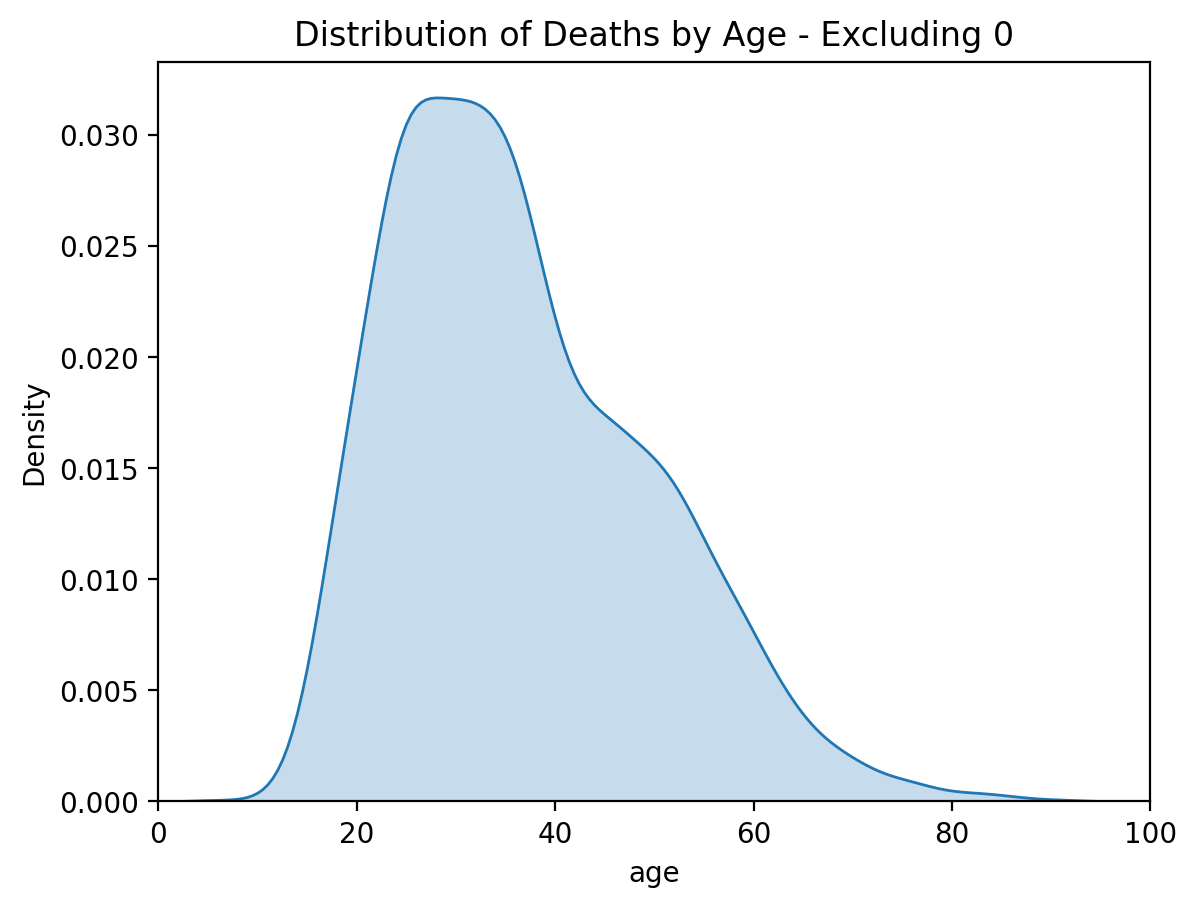

In [40]:
plt.figure(dpi=200)
sns.kdeplot(fatalities_exc_zero.age,
            fill=True,
            clip=(0,100))
plt.title("Distribution of Deaths by Age - Excluding 0")

plt.xlim(0, 100)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

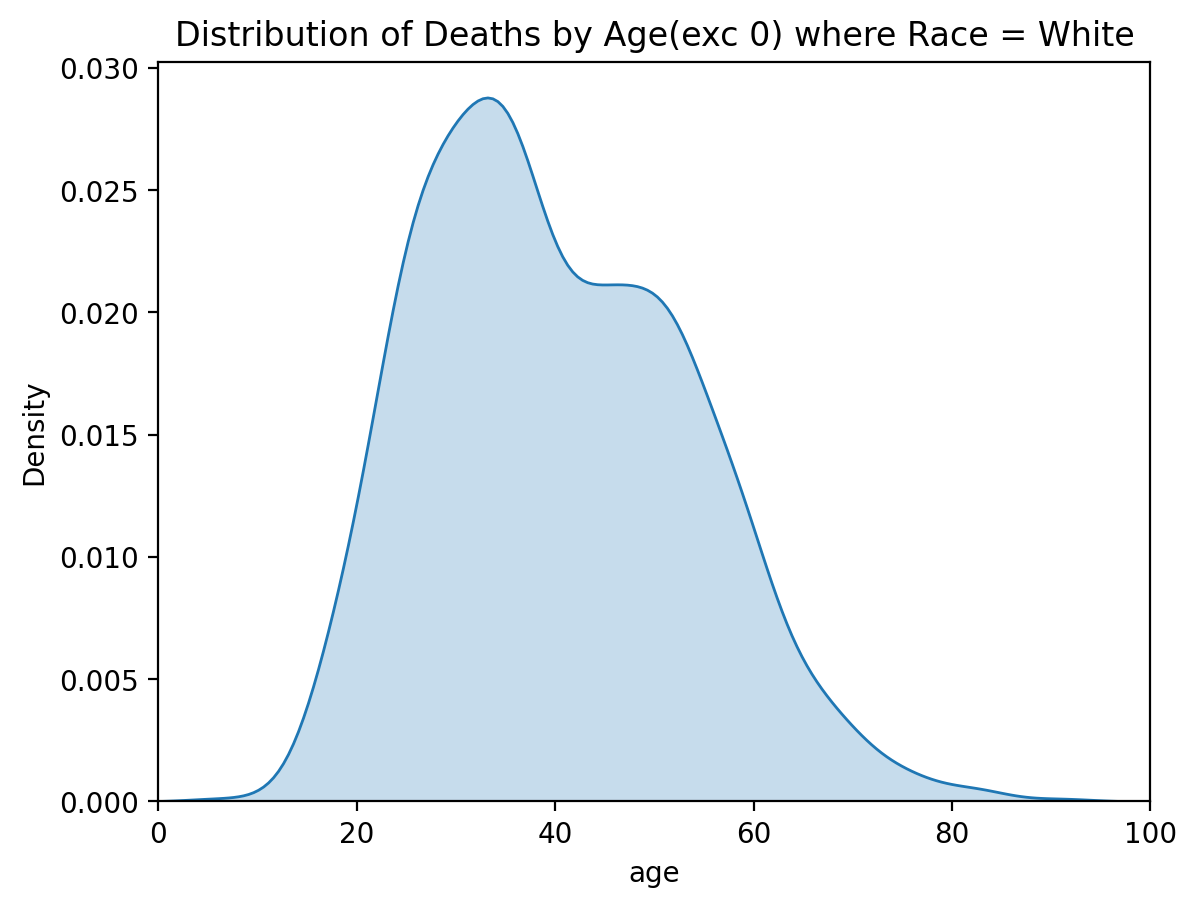

In [41]:
fatalities_white = fatalities_exc_zero.loc[(fatalities_exc_zero.race == "W")]

plt.figure(dpi=200)
sns.kdeplot(fatalities_white.age,
            fill=True,
            clip=(0,100))

plt.title("Distribution of Deaths by Age(exc 0) where Race = White")

plt.xlim(0, 100)
plt.show()

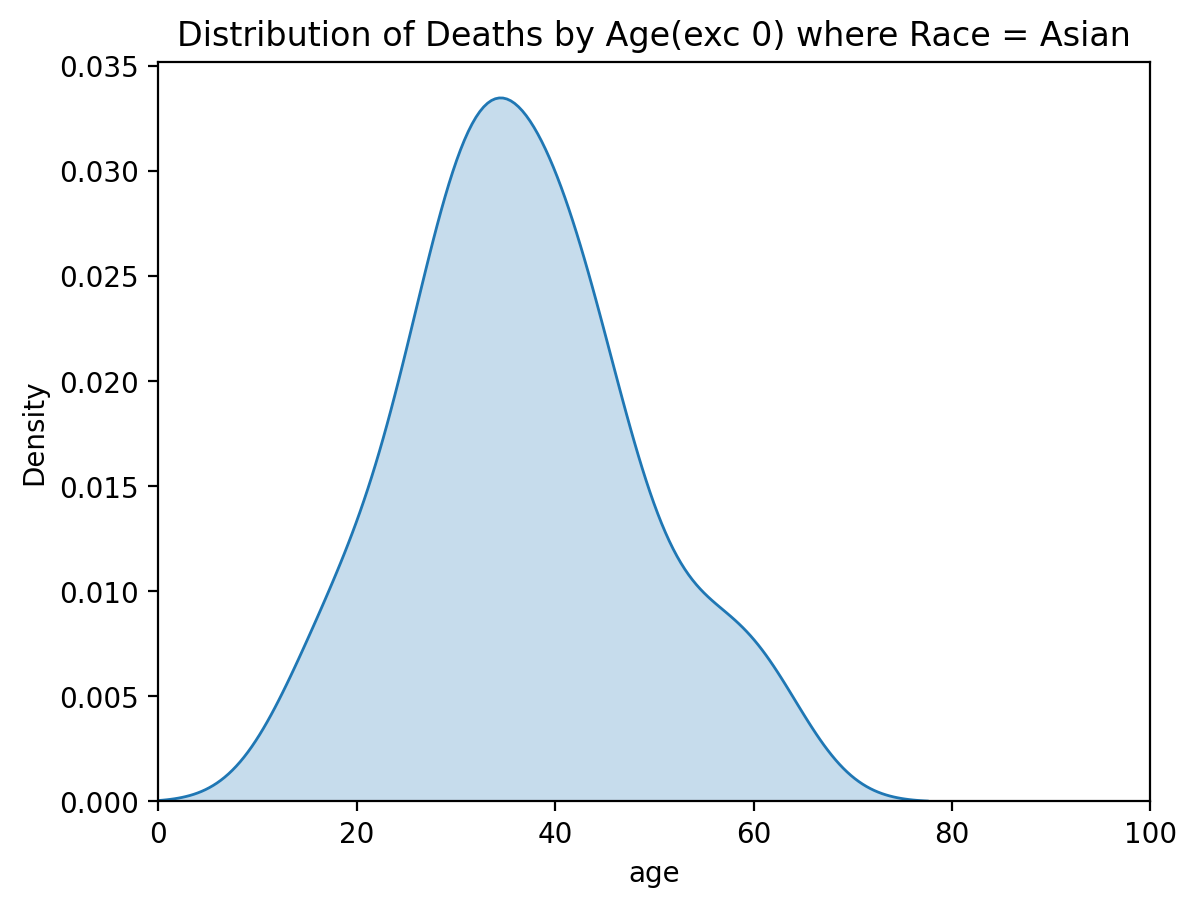

In [42]:
fatalities_asian = fatalities_exc_zero.loc[(fatalities_exc_zero.race == "A")]

plt.figure(dpi=200)
sns.kdeplot(fatalities_asian.age,
            fill=True,
            clip=(0,100))

plt.title("Distribution of Deaths by Age(exc 0) where Race = Asian")

plt.xlim(0, 100)
plt.show()

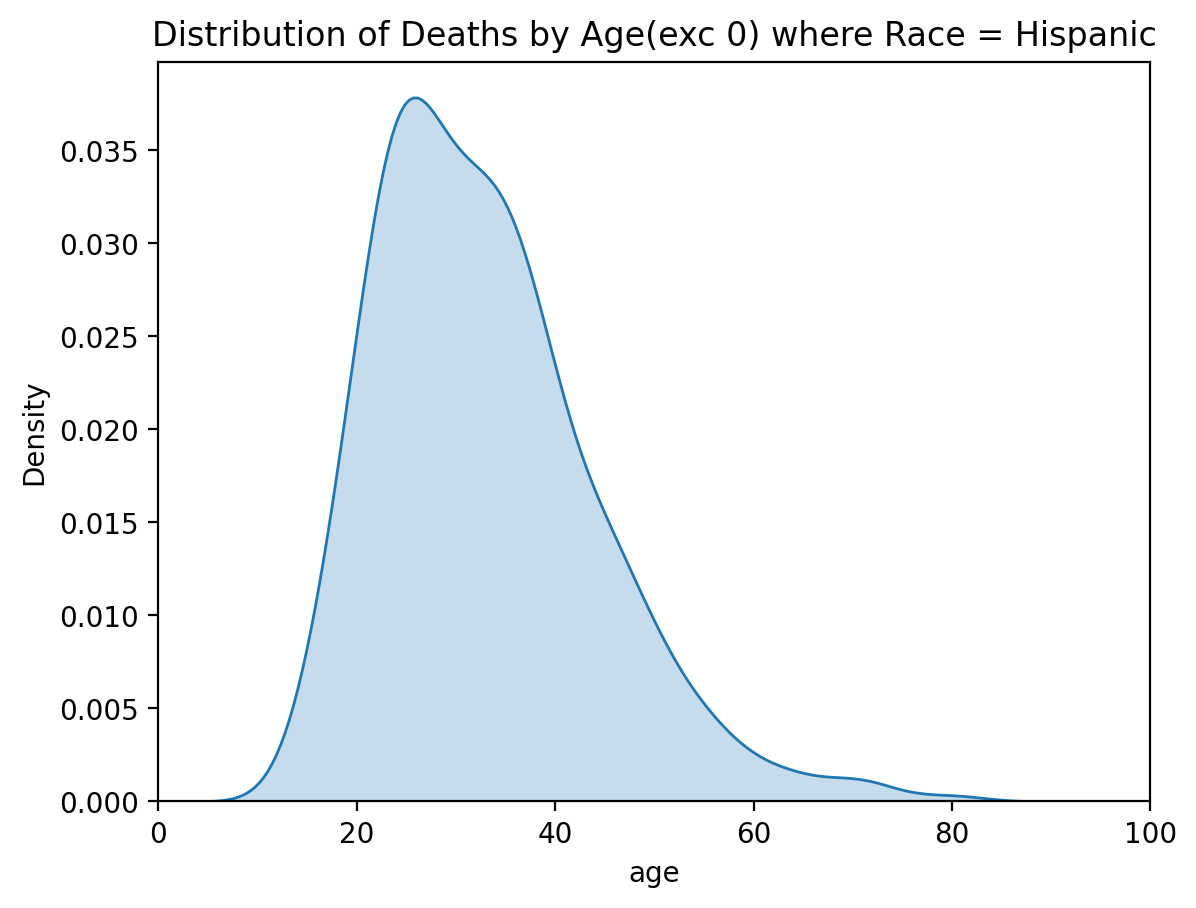

In [43]:
fatalities_hispanic = fatalities_exc_zero.loc[(fatalities_exc_zero.race == "H")]

plt.figure(dpi=200)
sns.kdeplot(fatalities_hispanic.age,
            fill=True,
            clip=(0,100))

plt.title("Distribution of Deaths by Age(exc 0) where Race = Hispanic")

plt.xlim(0, 100)
plt.show()

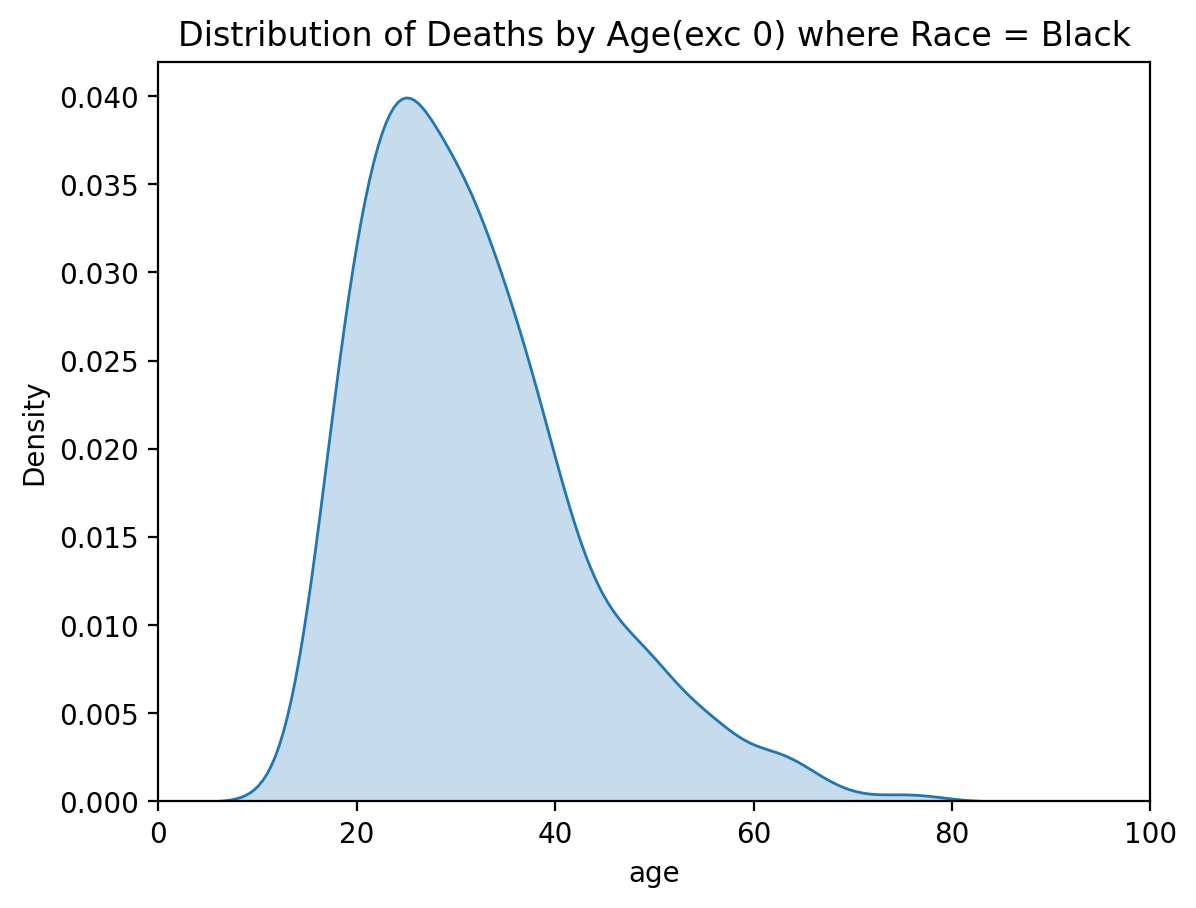

In [44]:
fatalities_black = fatalities_exc_zero.loc[(fatalities_exc_zero.race == "B")]

plt.figure(dpi=200)
sns.kdeplot(fatalities_black.age,
            fill=True,
            clip=(0,100))

plt.title("Distribution of Deaths by Age(exc 0) where Race = Black")

plt.xlim(0, 100)
plt.show()

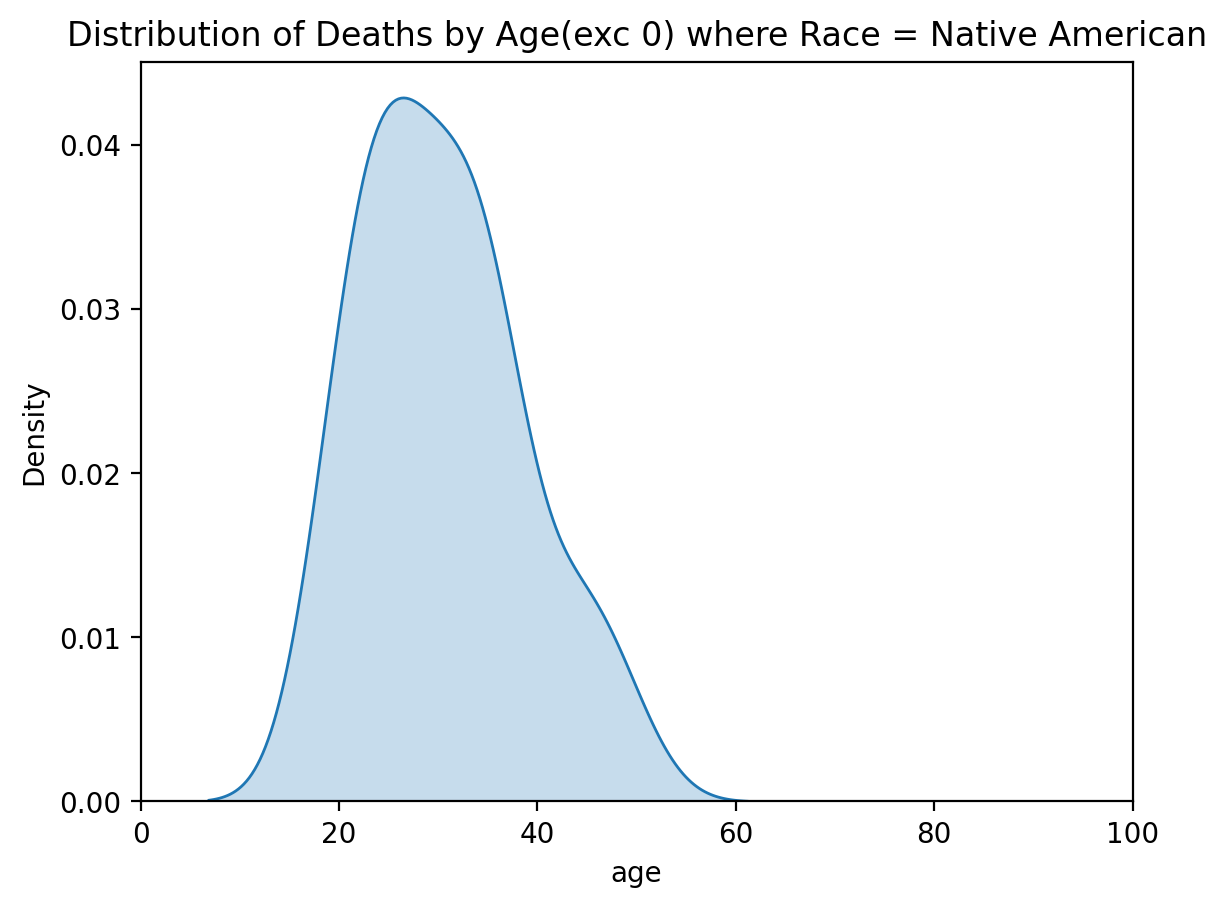

In [45]:
fatalities_native = fatalities_exc_zero.loc[(fatalities_exc_zero.race == "N")]

plt.figure(dpi=200)
sns.kdeplot(fatalities_native.age,
            fill=True,
            clip=(0,100))

plt.title("Distribution of Deaths by Age(exc 0) where Race = Native American")

plt.xlim(0, 100)
plt.show()

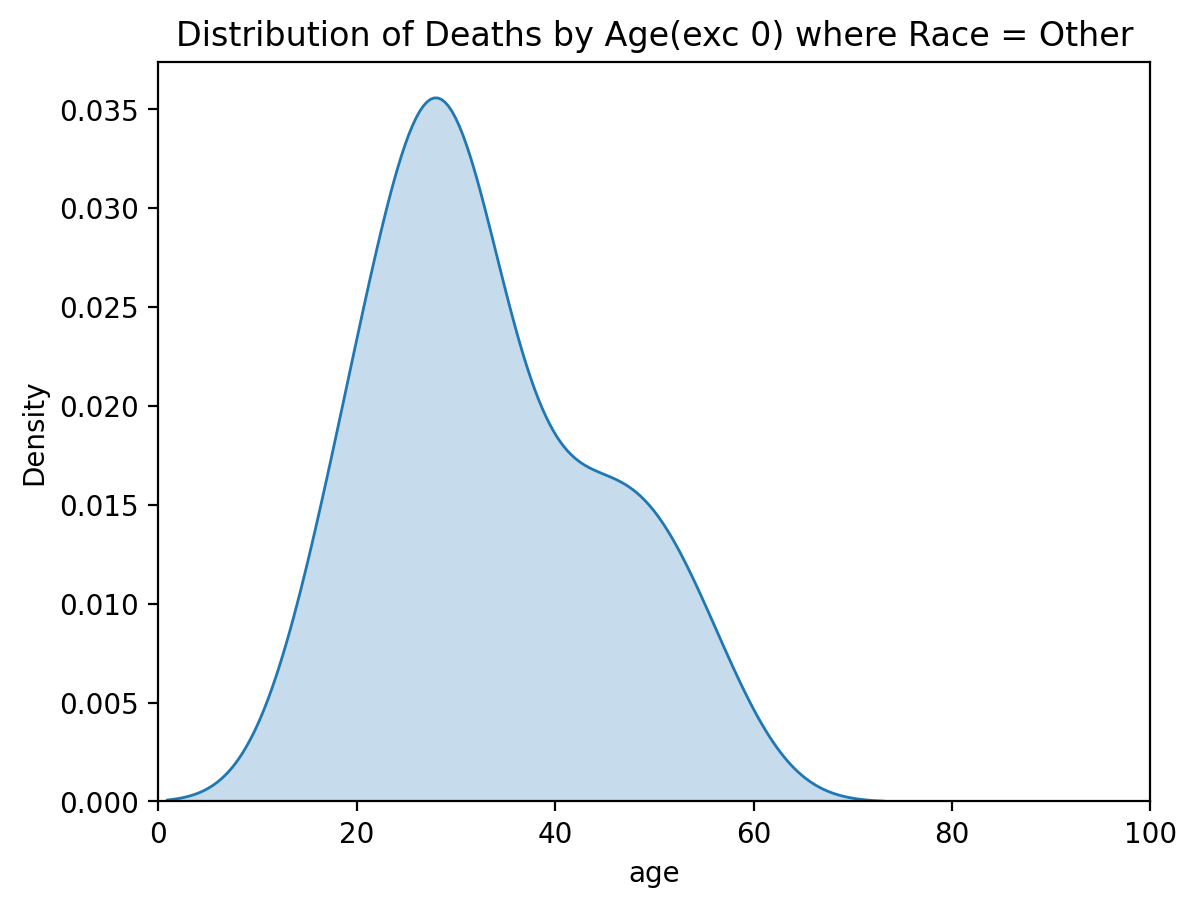

In [46]:
fatalities_other = fatalities_exc_zero.loc[(fatalities_exc_zero.race == "O")]

plt.figure(dpi=200)
sns.kdeplot(fatalities_other.age,
            fill=True,
            clip=(0,100))

plt.title("Distribution of Deaths by Age(exc 0) where Race = Other")

plt.xlim(0, 100)
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [47]:
fatalities_by_race

race
W    1201
B     618
H     423
A      39
N      31
O      28
Name: count, dtype: int64

In [48]:
race_bar = px.bar(x=fatalities_by_race.index,
                  y=fatalities_by_race.values,
                  title="Fatalities by Race - Totals",
                  color=fatalities_by_race.values,
                  color_continuous_scale="agsunset")

race_bar.update_layout(xaxis_title="Race",
                       yaxis_title="Number of Fatalities")

race_bar.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [49]:
mental_illness = df_fatalities.signs_of_mental_illness.value_counts()
mental_illness

signs_of_mental_illness
False    1902
True      633
Name: count, dtype: int64

In [50]:
mental_ill_pie = px.pie(labels=mental_illness.index,
                        values=mental_illness.values,
                        title="Signs of Mental Illness Breakdown",
                        names=mental_illness.index,
                        hole=0.5,)

mental_ill_pie.update_traces(textposition="outside", textinfo="percent+label")

mental_ill_pie.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [51]:
deaths_by_city = df_fatalities.value_counts("city")[0:10]
deaths_by_city

city
Los Angeles    39
Phoenix        31
Houston        27
Chicago        25
Las Vegas      21
San Antonio    20
Columbus       19
Miami          18
Austin         18
St. Louis      15
Name: count, dtype: int64

In [52]:
race_bar = px.bar(x=deaths_by_city.index,
                  y=deaths_by_city.values,
                  title="Cities with the Most Fatalities by Police",
                  color=deaths_by_city.values,
                  color_continuous_scale="bluered")

race_bar.update_layout(xaxis_title="City",
                       yaxis_title="Number of Fatalities")

race_bar.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [73]:
cities_race_breakdown = df_fatalities.groupby(by=["city", "race"],
                                         as_index=False).agg( pd.Series.count)

# cities_race_breakdown[['city', 'age']]

In [57]:
top_10_city_race = cities_race_breakdown.loc[(cities_race_breakdown.city == "Los Angeles") | #1
                                             (cities_race_breakdown.city == "Phoenix") | # 2
                                             (cities_race_breakdown.city == "Houston") | # 3
                                             (cities_race_breakdown.city == "Chicago") | # 4
                                             (cities_race_breakdown.city == "Las Vegas") | # 5
                                             (cities_race_breakdown.city == "San Antonio") | # 6
                                             (cities_race_breakdown.city == "Columbus") | # 7
                                             (cities_race_breakdown.city == "Miami") | # 8
                                             (cities_race_breakdown.city == "Austin") | # 9
                                             (cities_race_breakdown.city == "St. Louis") # 10
                                             ]
top_10_city_race.value_counts("race")

race
B    10
W    10
0     9
H     8
A     2
N     2
O     1
Name: count, dtype: int64

In [66]:
# Black
black_top_10 = top_10_city_race[["city", "id"]].loc[top_10_city_race.race == "B"]

black10_bar = px.bar(x=black_top_10.city,
                  y=black_top_10.id,
                  title="Top 10 Cities - Black Fatalities",
                  color=black_top_10.id,
                  color_continuous_scale="bluered")

black10_bar.update_layout(xaxis_title="City",
                          yaxis_title="Number of Fatalities")

black10_bar.show()

In [72]:
# White
white_top_10 = top_10_city_race[["city", "id"]].loc[top_10_city_race.race == "W"]

white10_bar = px.bar(x=white_top_10.city,
                     y=white_top_10.id,
                     title="Top 10 Cities - White Fatalities",
                     color=white_top_10.id,
                     color_continuous_scale="bluered")

white10_bar.update_layout(xaxis_title="City",
                          yaxis_title="Number of Fatalities")

white10_bar.show()

In [69]:
# Hispanic
hispanic_top_10 = top_10_city_race[["city", "id"]].loc[top_10_city_race.race == "H"]

hispanic10_bar = px.bar(x=hispanic_top_10.city,
                        y=hispanic_top_10.id,
                        title="Top 10 Cities - Hispanic Fatalities",
                        color=hispanic_top_10.id,
                        color_continuous_scale="bluered")

hispanic10_bar.update_layout(xaxis_title="City",
                          yaxis_title="Number of Fatalities")

hispanic10_bar.show()

In [70]:
# Asian
asian_top_10 = top_10_city_race[["city", "id"]].loc[top_10_city_race.race == "A"]

asian10_bar = px.bar(x=asian_top_10.city,
                     y=asian_top_10.id,
                     title="Top 10 Cities - Asian Fatalities",
                     color=asian_top_10.id,
                     color_continuous_scale="bluered")

asian10_bar.update_layout(xaxis_title="City",
                          yaxis_title="Number of Fatalities")

asian10_bar.show()

In [71]:
# Native American
native_top_10 = top_10_city_race[["city", "id"]].loc[top_10_city_race.race == "N"]

native10_bar = px.bar(x=native_top_10.city,
                     y=native_top_10.id,
                     title="Top 10 Cities - Native American Fatalities",
                     color=native_top_10.id,
                     color_continuous_scale="bluered")

native10_bar.update_layout(xaxis_title="City",
                          yaxis_title="Number of Fatalities")

native10_bar.show()

In [65]:
# Other
other_top_10 = top_10_city_race[["city", "id"]].loc[top_10_city_race.race == "O"]

,city,id
355,Columbus,1


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [83]:
fatalities_state = df_fatalities.value_counts("state")
fatalities_state.head()

state
CA    424
TX    225
FL    154
AZ    118
OH     79
Name: count, dtype: int64

In [93]:
us_map = px.choropleth(fatalities_state,
                       locations=fatalities_state.index,
                       color=fatalities_state.values,
                       hover_name=fatalities_state.index,
                       locationmode="USA-states",
                       scope="usa",
                       color_continuous_scale=px.colors.sequential.Viridis,
                       title="Number of Fatalities by State")

us_map.update_layout(coloraxis_showscale=True)

us_map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [105]:
df_fatalities["date"] = pd.to_datetime(df_fatalities["date"])
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2535 non-null   int64         
 1   name                     2535 non-null   object        
 2   date                     2535 non-null   datetime64[ns]
 3   manner_of_death          2535 non-null   object        
 4   armed                    2535 non-null   object        
 5   age                      2535 non-null   float64       
 6   gender                   2535 non-null   object        
 7   race                     2535 non-null   object        
 8   city                     2535 non-null   object        
 9   state                    2535 non-null   object        
 10  signs_of_mental_illness  2535 non-null   bool          
 11  threat_level             2535 non-null   object        
 12  flee                     2535 non-

In [108]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [126]:
fatalities_date = df_fatalities.value_counts("date")
fatalities_date.sort_index(inplace=True)
fatalities_date

date
2015-01-03    3
2015-01-04    2
2015-01-06    1
2015-01-07    2
2015-01-08    2
             ..
2017-12-03    2
2017-12-04    1
2017-12-05    4
2017-12-06    4
2017-12-07    3
Name: count, Length: 879, dtype: int64

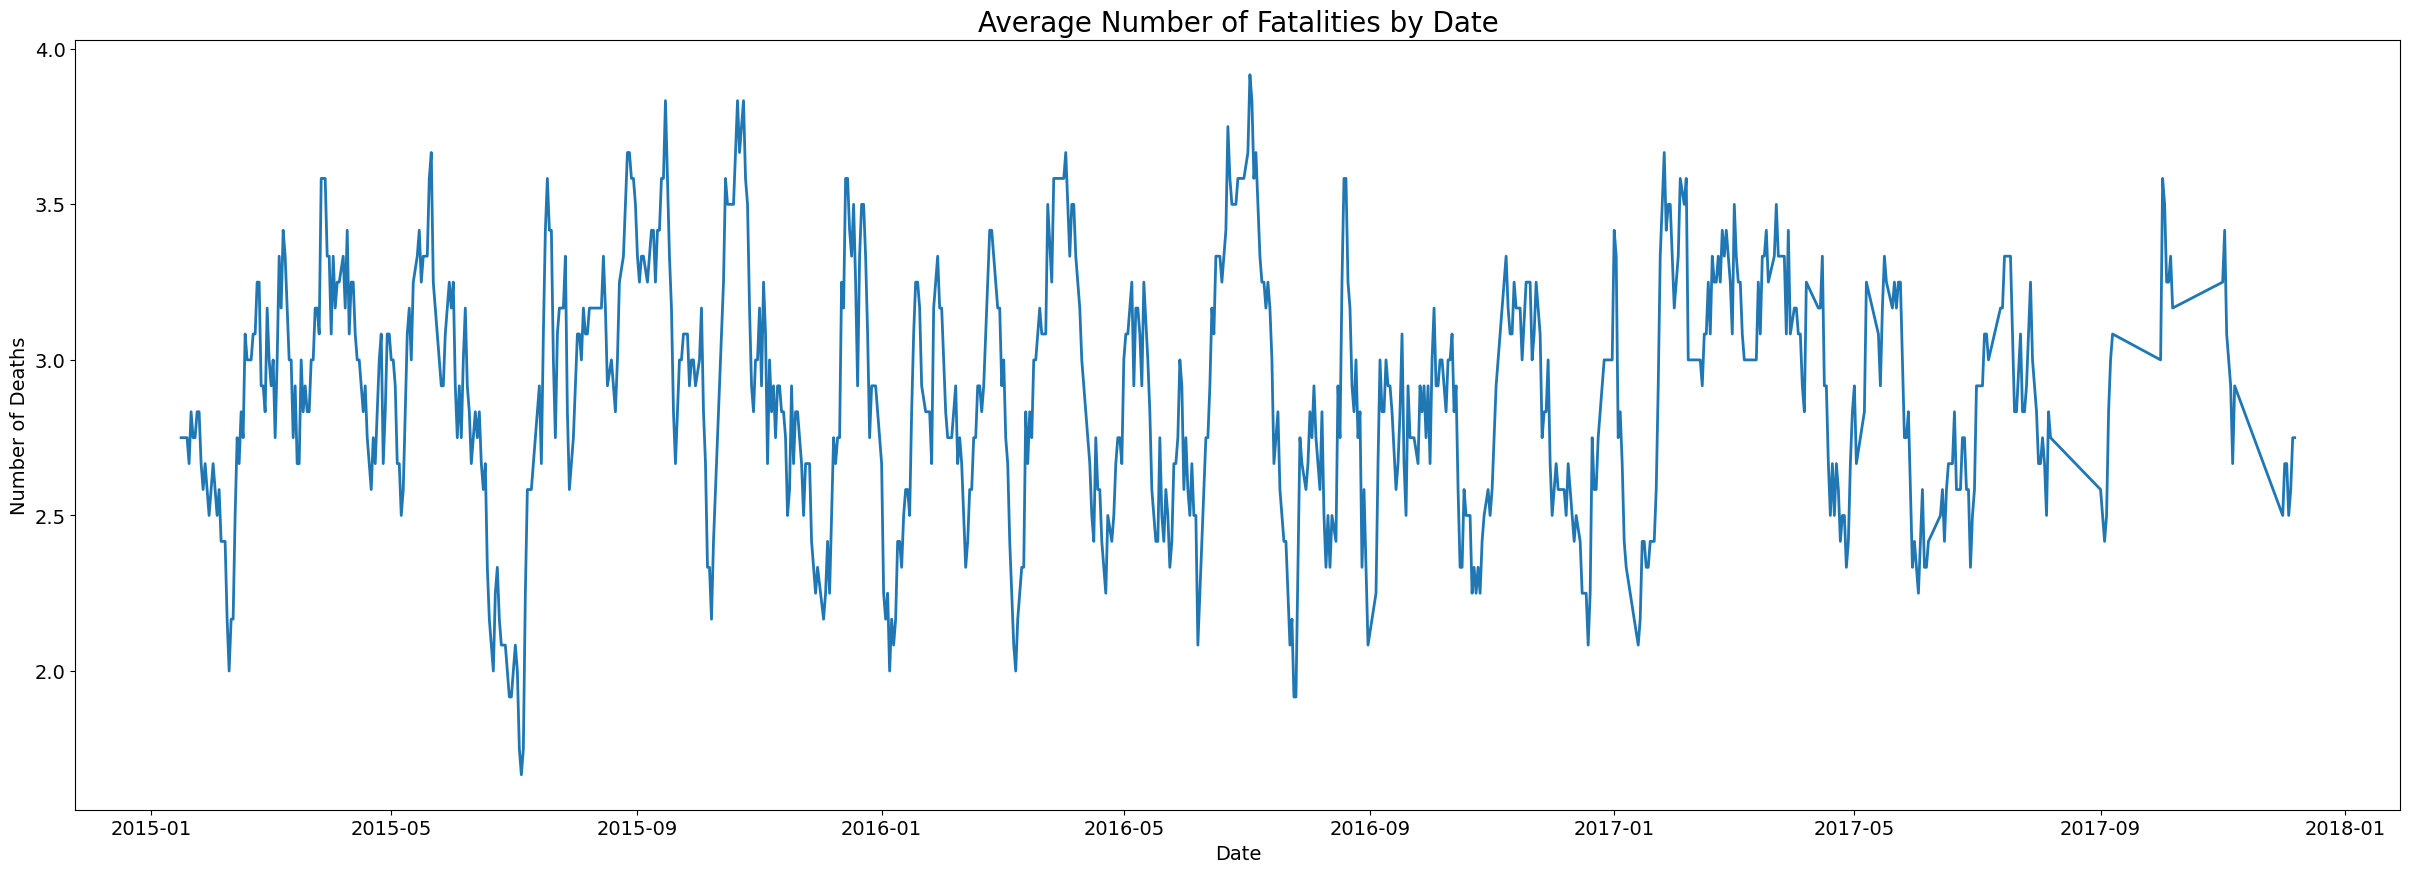

In [132]:
fatalities_roll_df = fatalities_date.rolling(window=12).mean()

plt.figure(figsize=(30,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Deaths", fontsize=14)
plt.title("Average Number of Fatalities by Date", fontsize=20)

plt.plot(fatalities_roll_df.index, fatalities_roll_df.values, linewidth=2)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).